<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/Electric_Vehicle_Data_Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRO**

Dataset description: This dataset contains information on the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered with the Washington State Department of Licensing (DOL). This dataset was introduced as part of an official invitation-based competition on Kaggle. Our SVM model should answer the question "This is my car's model & make, along with a few other parameters, what price can this vehicle be bought or sold?”

# EDA

In [1]:
#@title Install libraries
# !pip install ydata-profiling
# !pip install category_encoders

In [18]:
#@title Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#@title Load and previed dataset
data = pd.read_csv('/content/Electric_cars_dataset.csv')
data.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [4]:
#@title Info on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [5]:
#@title Descriptive Stats
data.describe(include='all')

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
count,64353,64353,64349,64344,64342,64347.000000,64346.000000,64349,64340,64353,64353,64353.000000,64353.000000,64184.000000,6.435300e+04,63843,63631,64353
unique,64353,5644,139,544,38,NaN,NaN,34,107,2,3,NaN,NaN,NaN,NaN,668,68,210
top,EV11120,5YJYGDEE9M,King,SEATTLE,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),69
freq,1,340,33552,11887,64168,NaN,NaN,27903,13138,47869,39948,NaN,NaN,NaN,NaN,1712,22555,4816
mean,NaN,NaN,NaN,NaN,NaN,98143.452888,2018.186212,NaN,NaN,NaN,NaN,106.948985,2524.990754,29.951904,1.972905e+08,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2856.064329,2.726742,NaN,NaN,NaN,NaN,104.093919,12402.895104,14.661124,1.069466e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,745.000000,1993.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.385000e+03,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,98052.000000,2017.000000,NaN,NaN,NaN,NaN,14.000000,0.000000,19.000000,1.372865e+08,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,98121.000000,2018.000000,NaN,NaN,NaN,NaN,73.000000,0.000000,34.000000,1.753776e+08,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,98370.000000,2021.000000,NaN,NaN,NaN,NaN,215.000000,0.000000,43.000000,2.299039e+08,NaN,NaN,NaN


In [6]:
#@title Create a pandas profiling on the dataset
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile.to_file("Electric_cars_dataset.html")

In [7]:
#@title Handle data types
data['Expected Price ($1k)'] = pd.to_numeric(data['Expected Price ($1k)'], errors='coerce')
data['Model Year'] = data['Model Year'].astype(str)

In [8]:
#@title Missing values
# data.isnull().sum()
data = data.dropna()

In [9]:
#@title Handle duplicates
data.duplicated().sum()
# data.drop_duplicates(inplace=True)

np.int64(0)

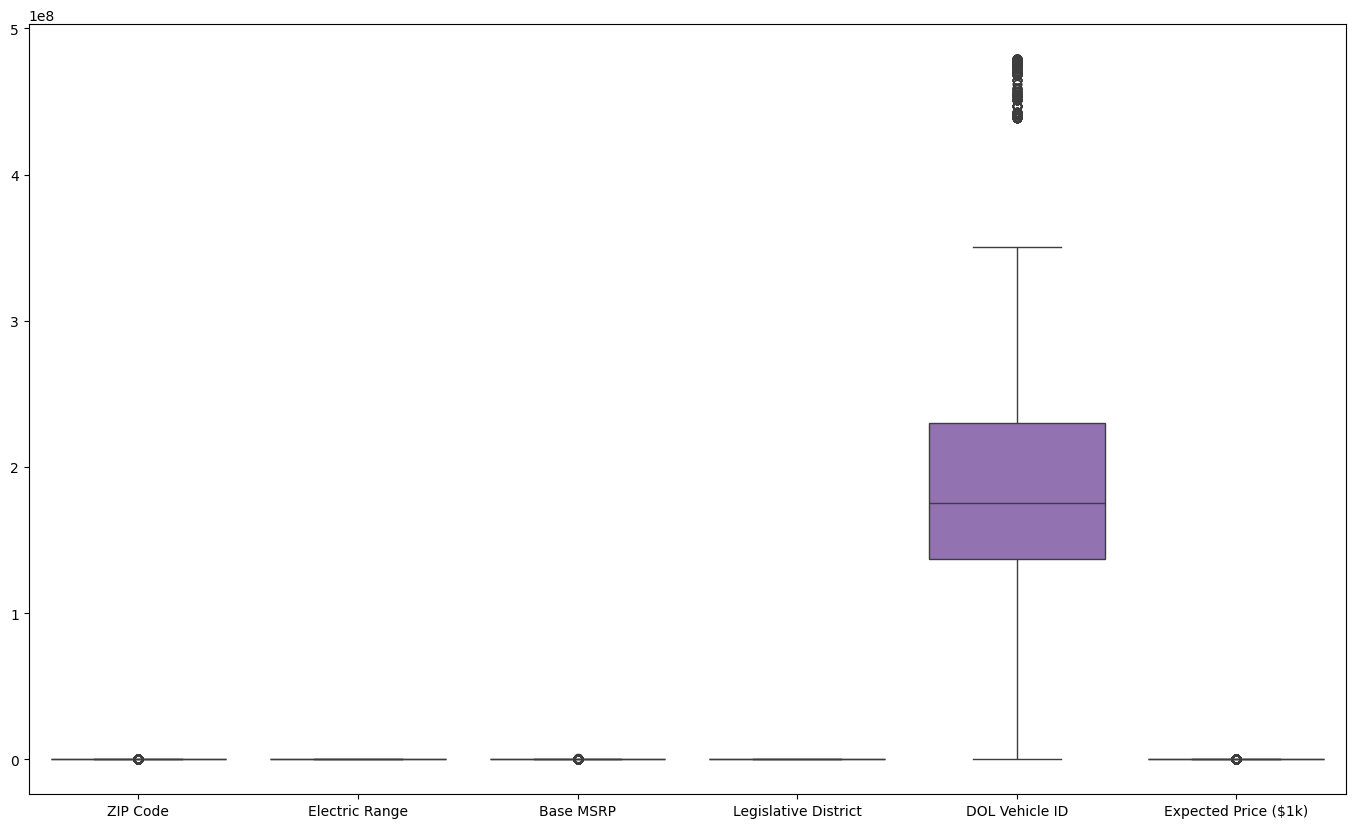

In [10]:
#@title Plot outliers
plt.figure(figsize=(17, 10))
sns.boxplot(data)
plt.show()

In [11]:
#@title Encode categorical features
le = LabelEncoder()
# encoder = ce.TargetEncoder()
# data['Make'] = encoder.fit_transform(data['Make'], data['Expected Price ($1k)'])
data['Electric Vehicle Type'] = le.fit_transform(data['Electric Vehicle Type'])
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = le.fit_transform(data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])


# Building SVM Model

In [12]:
#@title Select features and target variable
X = data[['Model', 'Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Model Year', 'Electric Range', 'Base MSRP', 'Electric Utility']]
y = data['Expected Price ($1k)']

In [13]:
#@title Split dataset to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#@title Target Encode features
# Prevents leakage
encoder = ce.TargetEncoder()
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

In [15]:
#@title Build and train an SVM model on the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVR(kernel='linear', C=1, epsilon=0.1, )
svm_model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [19]:
#@title Assess model performance
y_pred = svm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = int(np.sqrt(mse))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 9
R-squared: 0.8475525206136947


Ways of improving the model performance may include scaling properly and hyperparameter tuning. The hyperparameter include C, gamma, epsilon. Also choosing the right kernel is advisable although some take too long to fit.